#  1. Importações e dados
.

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [41]:
# Carregando os dados
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/acidentes_pbic_2020_2025_limpo.csv', encoding="utf-8")

# 2. Corrigir vírgula para ponto e converter para float
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.', regex=False).astype(float)

# 3. Selecionar apenas as colunas desejadas
colunas = [
    'uf', 'br', 'km', 'municipio',
    'tipo_acidente', 'classificacao_acidente',
    'tipo_pista', 'latitude', 'longitude'
]
df_filtrado = df[colunas]

# 4. Exportar para um novo CSV
df_filtrado.to_csv("acidentes_prf_filtrado.csv", index=False)


/tmp/ipykernel_203901/1660278261.py:2: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/acidentes_pbic_2020_2025_limpo.csv', encoding="utf-8")


In [28]:
df = df.dropna(subset=['pesid'])


df.head()



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,longitude,regional,delegacia,uop,ano_arquivo,mes,dia_mes,hora,gravidade_numerica,total_vitimas
0,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
1,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
2,260031.0,578991.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
3,260031.0,578986.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
4,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,"-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0


### Distribuição dos Acidentes por Tipo de Pista
Aqui verificamos quais tipos de pista concentram mais acidentes.


🚦 Distribuição de acidentes por tipo de pista:
    1. Simples: 1,353,781 acidentes
    2. Dupla: 944,682 acidentes
    3. Múltipla: 212,322 acidentes


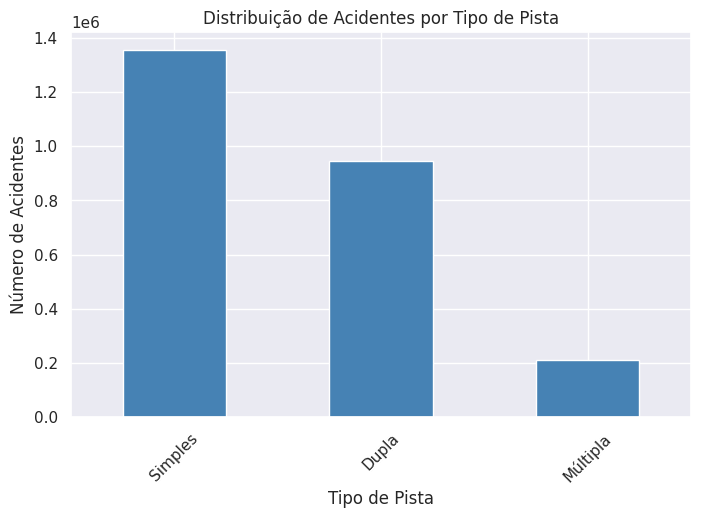

In [29]:
if 'tipo_pista' in df.columns:
    pista_counts = df['tipo_pista'].value_counts().head(10)

    print("🚦 Distribuição de acidentes por tipo de pista:")
    for i, (pista, qtd) in enumerate(pista_counts.items(), 1):
        print(f"   {i:2d}. {pista}: {qtd:,} acidentes")

    # Visualização
    pista_counts.plot(kind='bar', figsize=(8,5), color='steelblue')
    plt.title("Distribuição de Acidentes por Tipo de Pista")
    plt.xlabel("Tipo de Pista")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.show()


🏷️ Top combinações Tipo de Pista × Classificação do Acidente:
   Simples - Com Vítimas Feridas: 946,692 acidentes
   Dupla - Com Vítimas Feridas: 747,019 acidentes
   Simples - Com Vítimas Fatais: 282,127 acidentes
   Múltipla - Com Vítimas Feridas: 177,102 acidentes
   Simples - Sem Vítimas: 124,895 acidentes
   Dupla - Sem Vítimas: 107,735 acidentes
   Dupla - Com Vítimas Fatais: 89,926 acidentes
   Múltipla - Sem Vítimas: 20,834 acidentes
   Múltipla - Com Vítimas Fatais: 14,386 acidentes


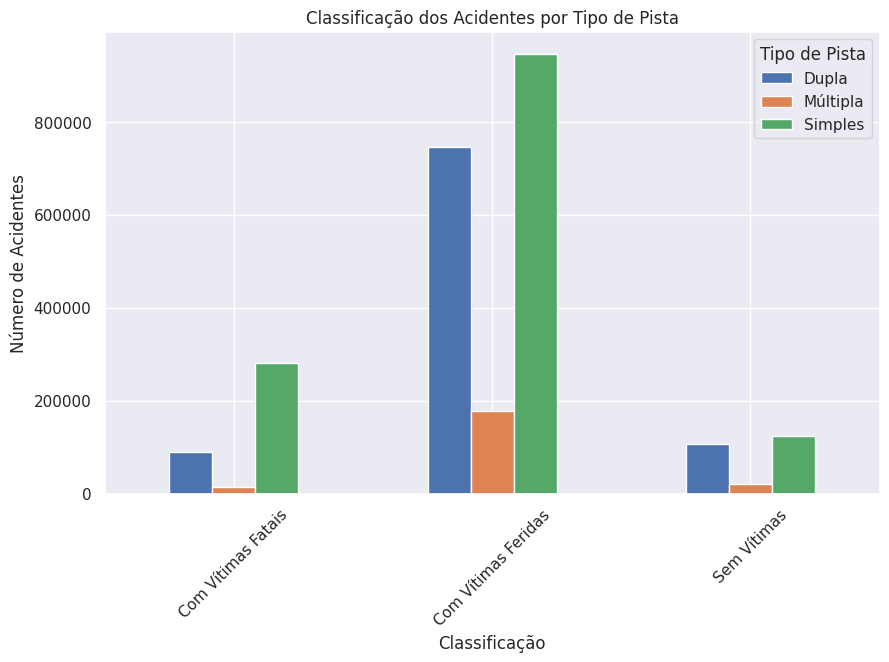

In [30]:
if 'tipo_pista' in df.columns and 'classificacao_acidente' in df.columns:
    class_pista = df.groupby(['tipo_pista', 'classificacao_acidente']).size().reset_index(name='acidentes')
    top_class_pista = class_pista.sort_values('acidentes', ascending=False).head(15)

    print("🏷️ Top combinações Tipo de Pista × Classificação do Acidente:")
    for i, row in top_class_pista.iterrows():
        print(f"   {row['tipo_pista']} - {row['classificacao_acidente']}: {row['acidentes']:,} acidentes")

    # Visualização
    pivot = class_pista.pivot(index='classificacao_acidente', columns='tipo_pista', values='acidentes').fillna(0)
    pivot.plot(kind='bar', figsize=(10,6))
    plt.title("Classificação dos Acidentes por Tipo de Pista")
    plt.xlabel("Classificação")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Pista")
    plt.show()


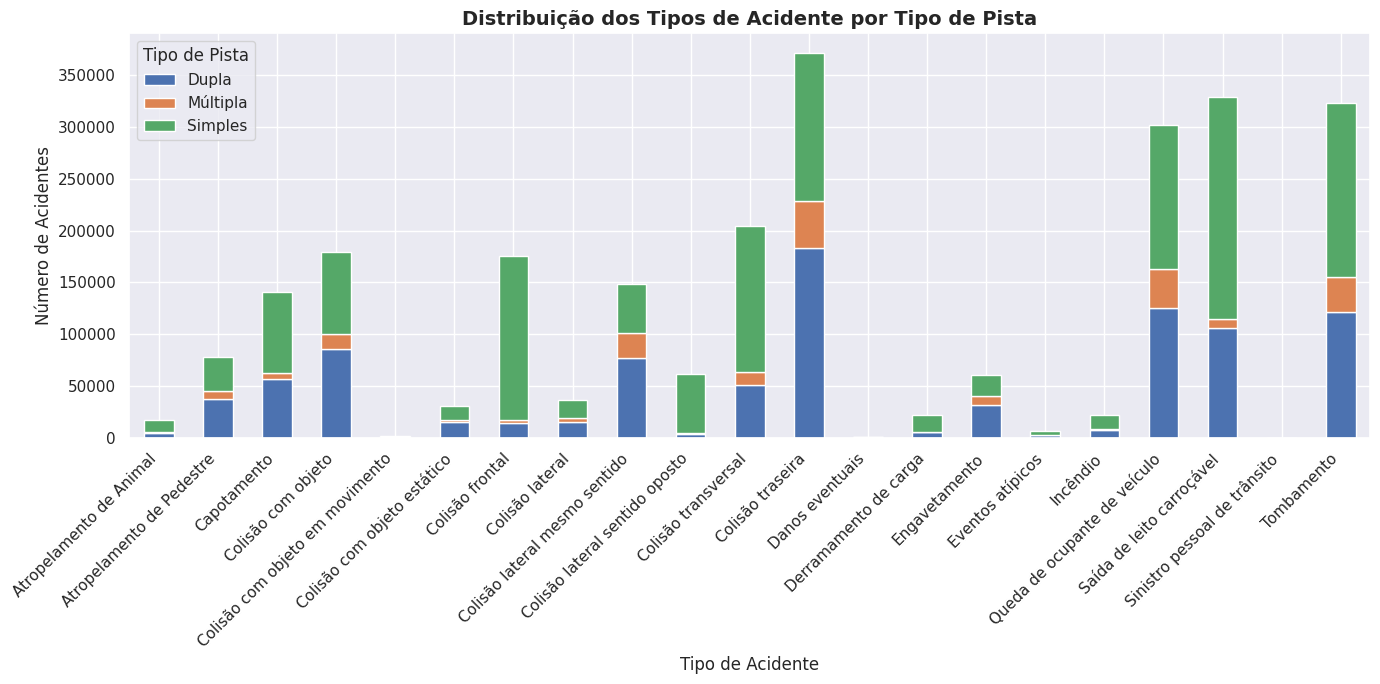

In [31]:
if 'tipo_pista' in df.columns and 'tipo_acidente' in df.columns:
    acidente_pista = df.groupby(['tipo_pista', 'tipo_acidente']).size().reset_index(name='acidentes')

    pivot = acidente_pista.pivot(index='tipo_acidente', columns='tipo_pista', values='acidentes').fillna(0)

    pivot.plot(kind='bar', figsize=(14,7), stacked=True)
    plt.title("Distribuição dos Tipos de Acidente por Tipo de Pista", fontsize=14, fontweight='bold')
    plt.xlabel("Tipo de Acidente")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Tipo de Pista")
    plt.tight_layout()
    plt.show()


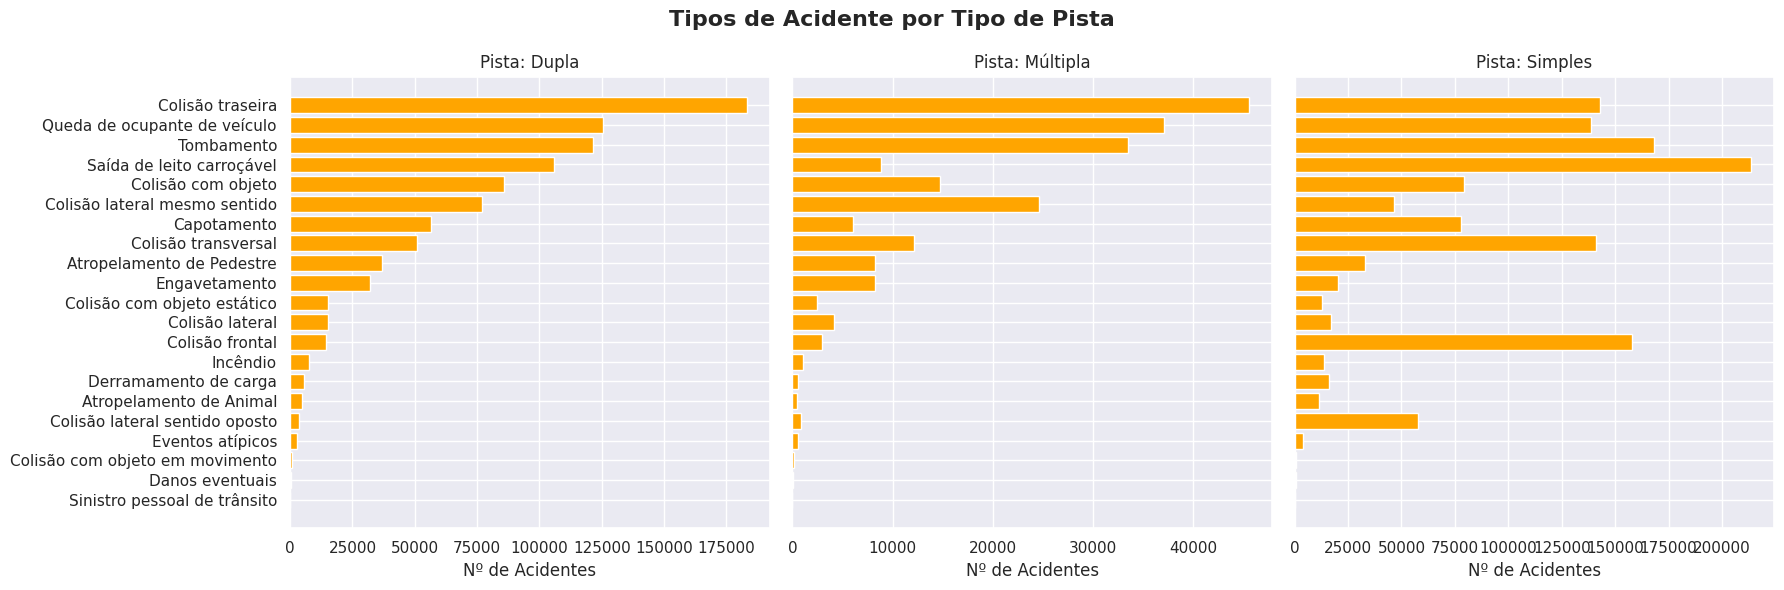

In [32]:
if 'tipo_pista' in df.columns and 'tipo_acidente' in df.columns:
    acidente_pista = df.groupby(['tipo_pista', 'tipo_acidente']).size().reset_index(name='acidentes')

    tipos_pista = acidente_pista['tipo_pista'].unique()
    fig, axes = plt.subplots(1, len(tipos_pista), figsize=(18,6), sharey=True)
    fig.suptitle("Tipos de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')

    for ax, pista in zip(axes, tipos_pista):
        subset = (
            acidente_pista[acidente_pista['tipo_pista'] == pista]
            .sort_values('acidentes', ascending=False)
        )
        ax.barh(subset['tipo_acidente'], subset['acidentes'], color='orange')
        ax.set_title(f"Pista: {pista}")
        ax.set_xlabel("Nº de Acidentes")
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


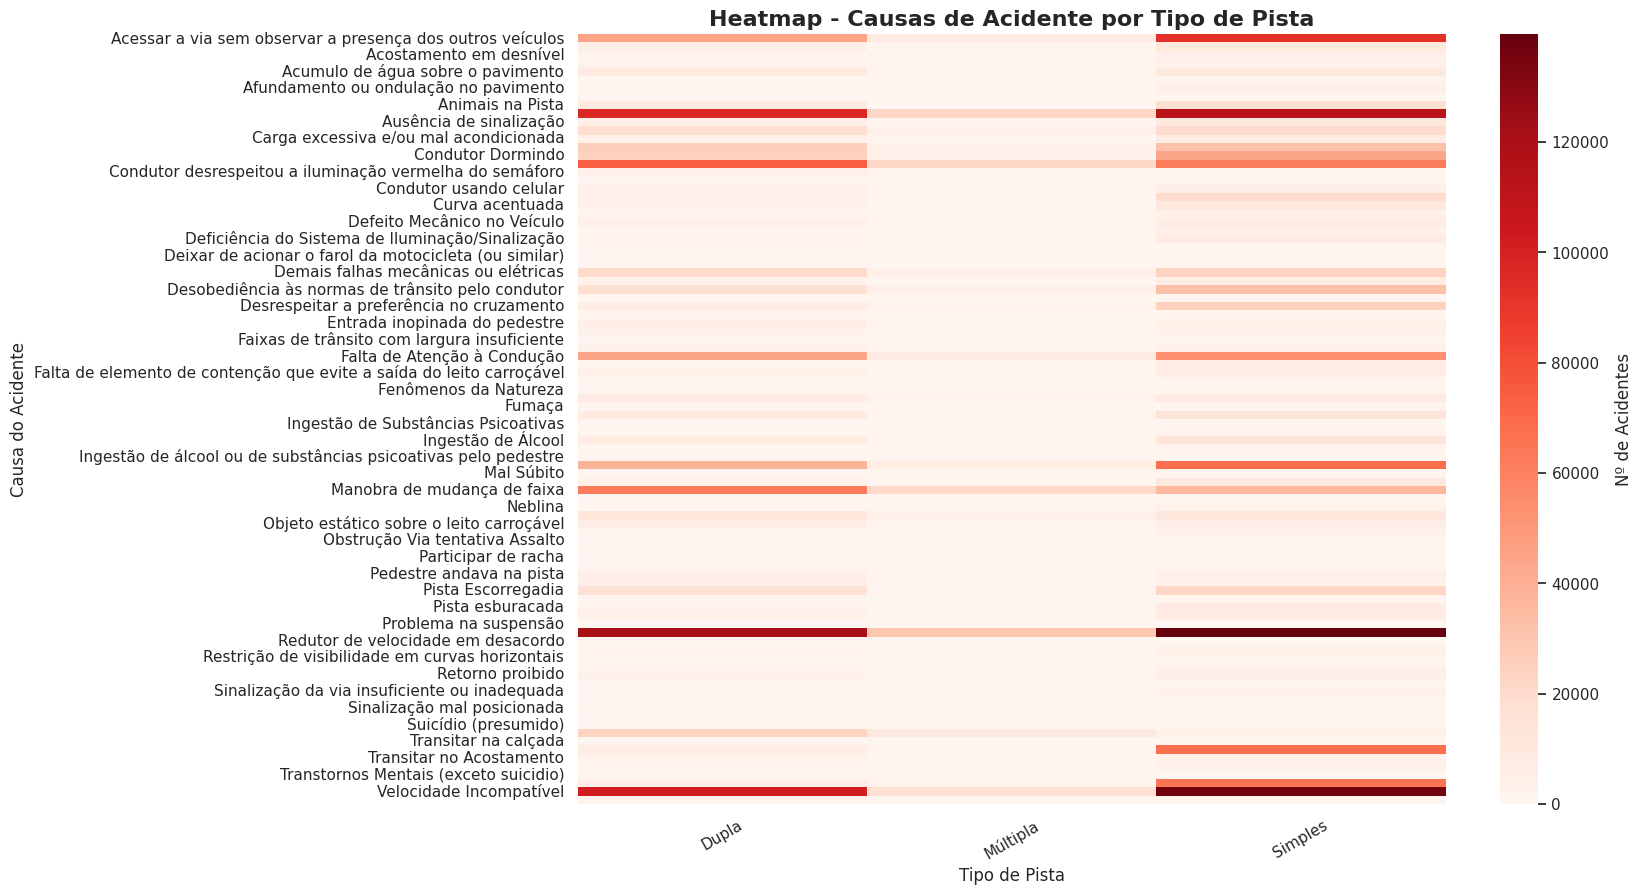

In [33]:
import seaborn as sns

if 'tipo_pista' in df.columns and 'causa_acidente' in df.columns:
    causa_pista = df.groupby(['tipo_pista', 'causa_acidente']).size().reset_index(name='acidentes')
    pivot = causa_pista.pivot(index='causa_acidente', columns='tipo_pista', values='acidentes').fillna(0)

    plt.figure(figsize=(14,10))
    sns.heatmap(pivot, annot=False, cmap="Reds", cbar_kws={'label': 'Nº de Acidentes'})
    plt.title("Heatmap - Causas de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')
    plt.xlabel("Tipo de Pista")
    plt.ylabel("Causa do Acidente")
    plt.xticks(rotation=30)
    plt.yticks(rotation=0)
    plt.show()


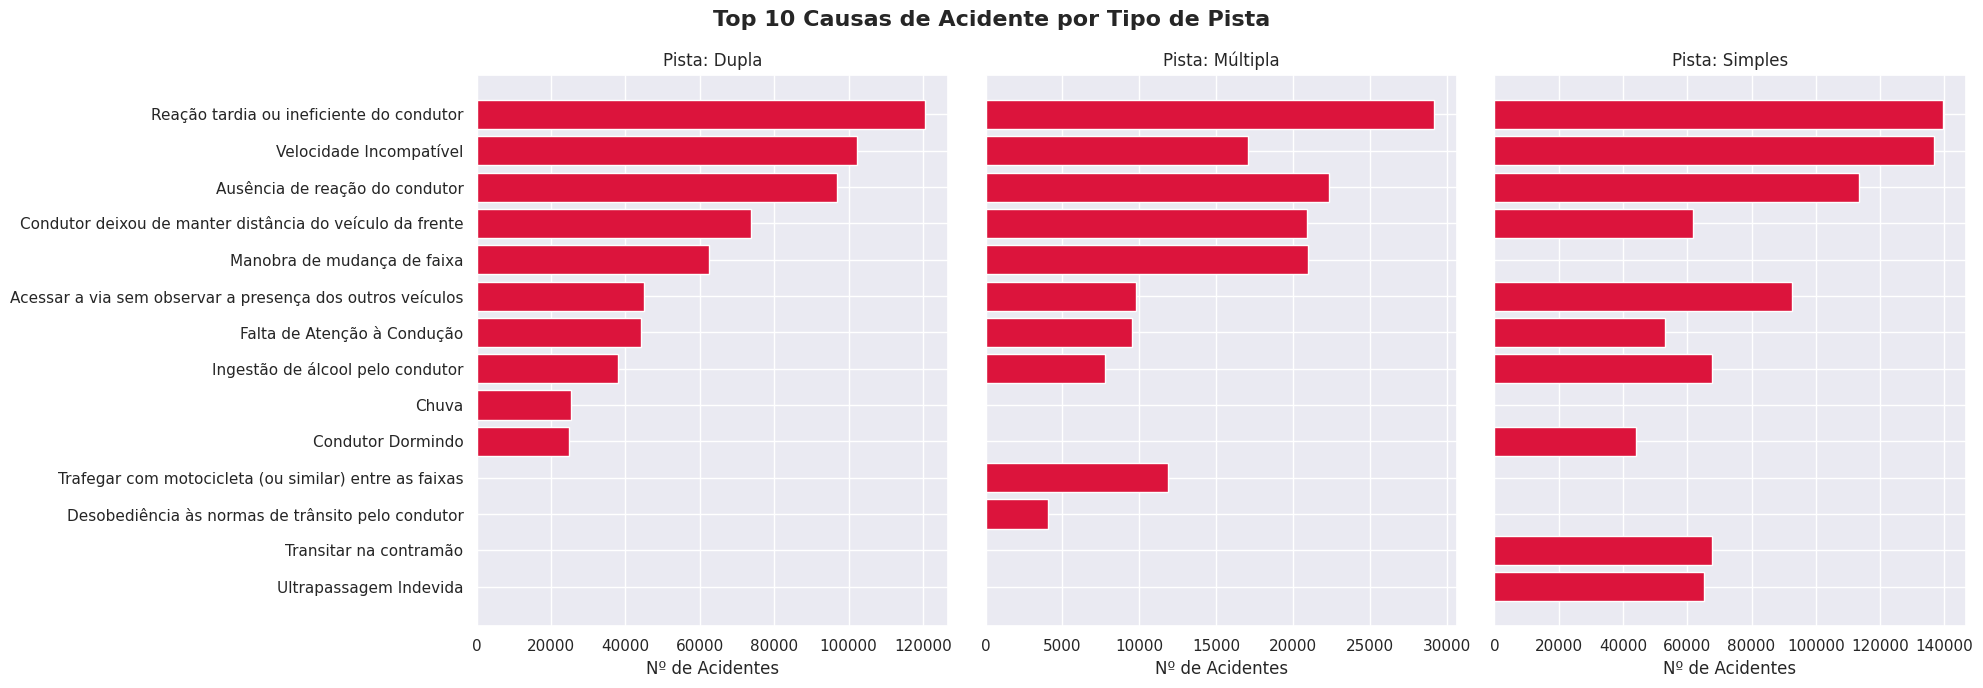

In [34]:
if 'tipo_pista' in df.columns and 'causa_acidente' in df.columns:
    causa_pista = df.groupby(['tipo_pista', 'causa_acidente']).size().reset_index(name='acidentes')

    fig, axes = plt.subplots(1, len(causa_pista['tipo_pista'].unique()), figsize=(20, 7), sharey=True)
    fig.suptitle("Top 10 Causas de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')

    for ax, pista in zip(axes, causa_pista['tipo_pista'].unique()):
        top = (
            causa_pista[causa_pista['tipo_pista'] == pista]
            .sort_values('acidentes', ascending=False)
            .head(10)
        )
        ax.barh(top['causa_acidente'], top['acidentes'], color='crimson')
        ax.set_title(f"Pista: {pista}")
        ax.set_xlabel("Nº de Acidentes")
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


# Veiculos x Acidentes

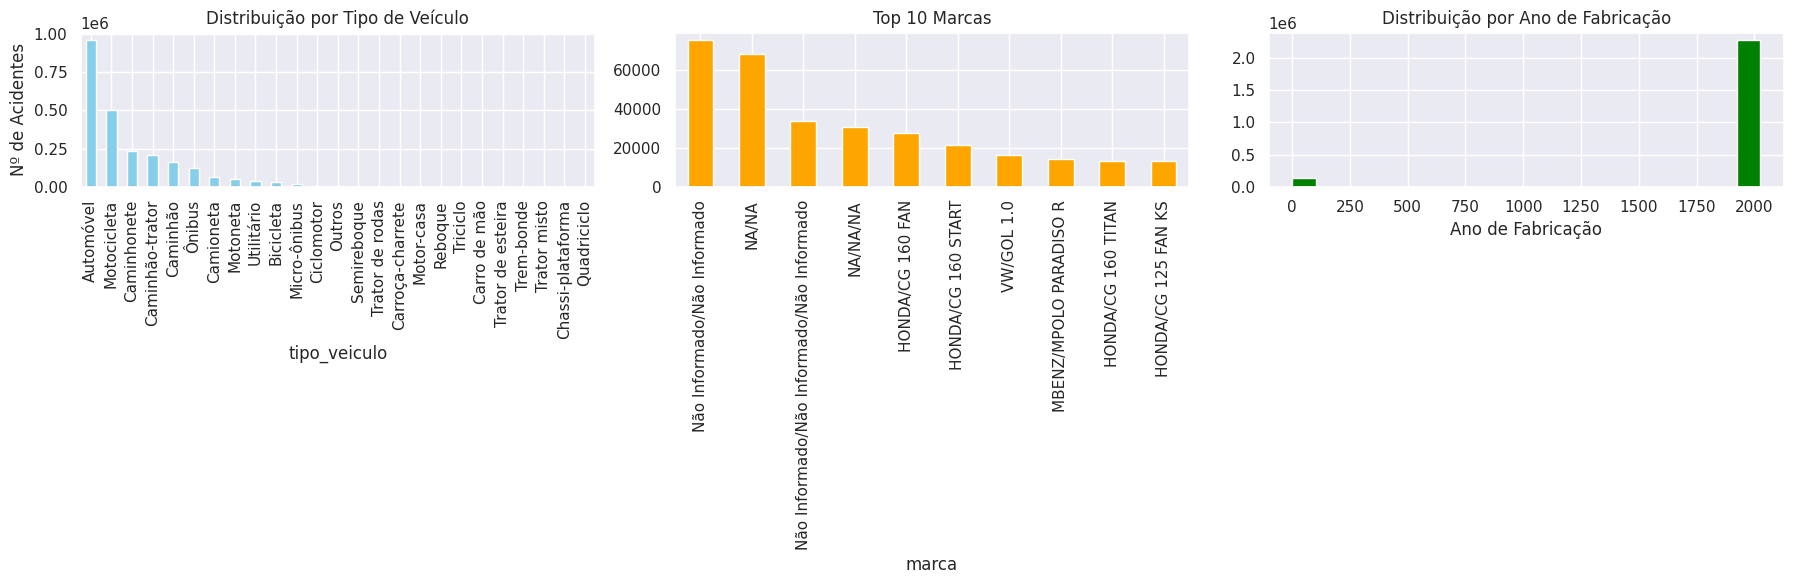

In [35]:
if {'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo'}.issubset(df.columns):
    fig, axes = plt.subplots(1, 3, figsize=(18,6))
    df['tipo_veiculo'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title("Distribuição por Tipo de Veículo")
    axes[0].set_ylabel("Nº de Acidentes")

    df['marca'].value_counts().head(10).plot(kind='bar', ax=axes[1], color='orange')
    axes[1].set_title("Top 10 Marcas")

    df['ano_fabricacao_veiculo'].dropna().astype(int).hist(ax=axes[2], bins=20, color='green')
    axes[2].set_title("Distribuição por Ano de Fabricação")
    axes[2].set_xlabel("Ano de Fabricação")

    plt.tight_layout()
    plt.show()


In [36]:
df_veiculos = df[(df['ano_fabricacao_veiculo'] >= 2000) & (df['ano_fabricacao_veiculo'] <= 2015)].copy()


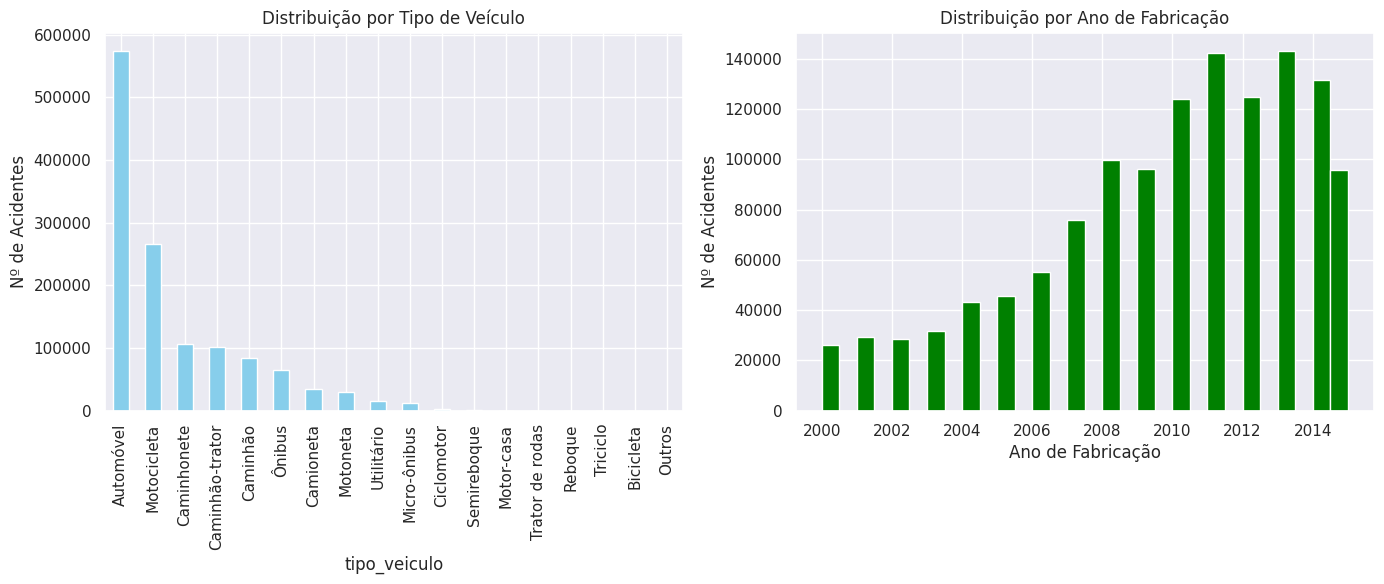

In [37]:

if {'tipo_veiculo', 'ano_fabricacao_veiculo'}.issubset(df_veiculos.columns):
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Distribuição por tipo de veículo
    df_veiculos['tipo_veiculo'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title("Distribuição por Tipo de Veículo")
    axes[0].set_ylabel("Nº de Acidentes")

    # Distribuição por ano de fabricação
    df_veiculos['ano_fabricacao_veiculo'].dropna().astype(int).hist(ax=axes[1], bins=30, color='green')
    axes[1].set_title("Distribuição por Ano de Fabricação")
    axes[1].set_xlabel("Ano de Fabricação")
    axes[1].set_ylabel("Nº de Acidentes")

    plt.tight_layout()
    plt.show()



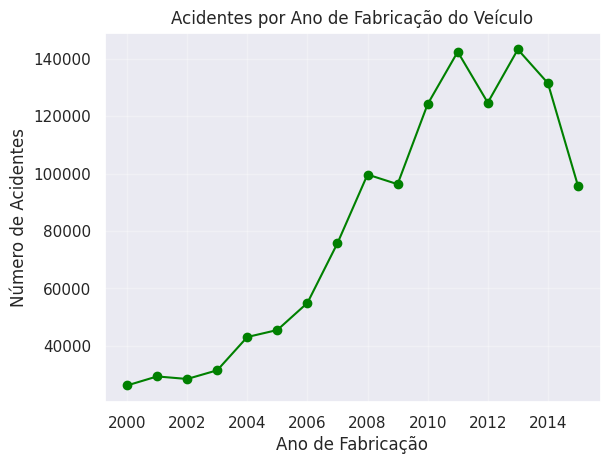

In [38]:
df_veiculos['ano_fabricacao_veiculo'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Acidentes por Ano de Fabricação do Veículo")
plt.xlabel("Ano de Fabricação")
plt.ylabel("Número de Acidentes")
plt.grid(True, alpha=0.3)
plt.show()


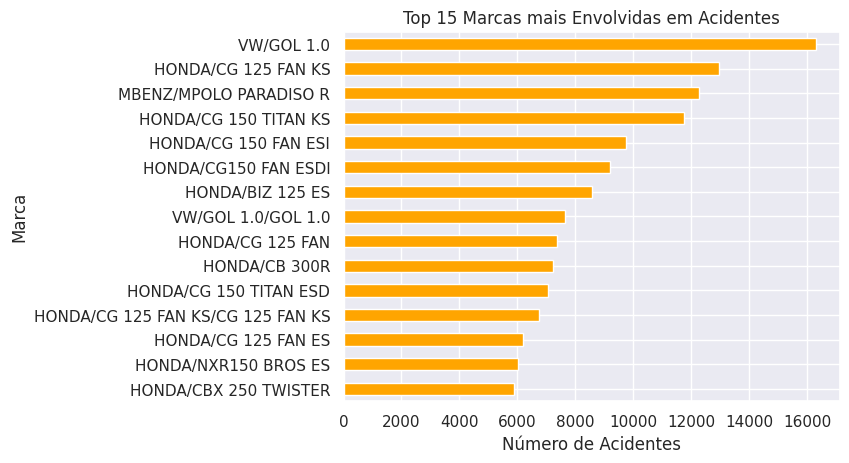

In [39]:
top_marcas = df_veiculos['marca'].value_counts().head(15)
top_marcas.plot(kind='barh', color='orange')
plt.title("Top 15 Marcas mais Envolvidas em Acidentes")
plt.xlabel("Número de Acidentes")
plt.ylabel("Marca")
plt.gca().invert_yaxis()
plt.show()


🚨 Top 10 marcas com mais acidentes:
marca
VW/GOL 1.0                16307
HONDA/CG 125 FAN KS       12973
MBENZ/MPOLO PARADISO R    12259
HONDA/CG 150 TITAN KS     11750
HONDA/CG 150 FAN ESI       9768
HONDA/CG150 FAN ESDI       9185
HONDA/BIZ 125 ES           8570
VW/GOL 1.0/GOL 1.0         7651
HONDA/CG 125 FAN           7382
HONDA/CB 300R              7232
Name: count, dtype: int64


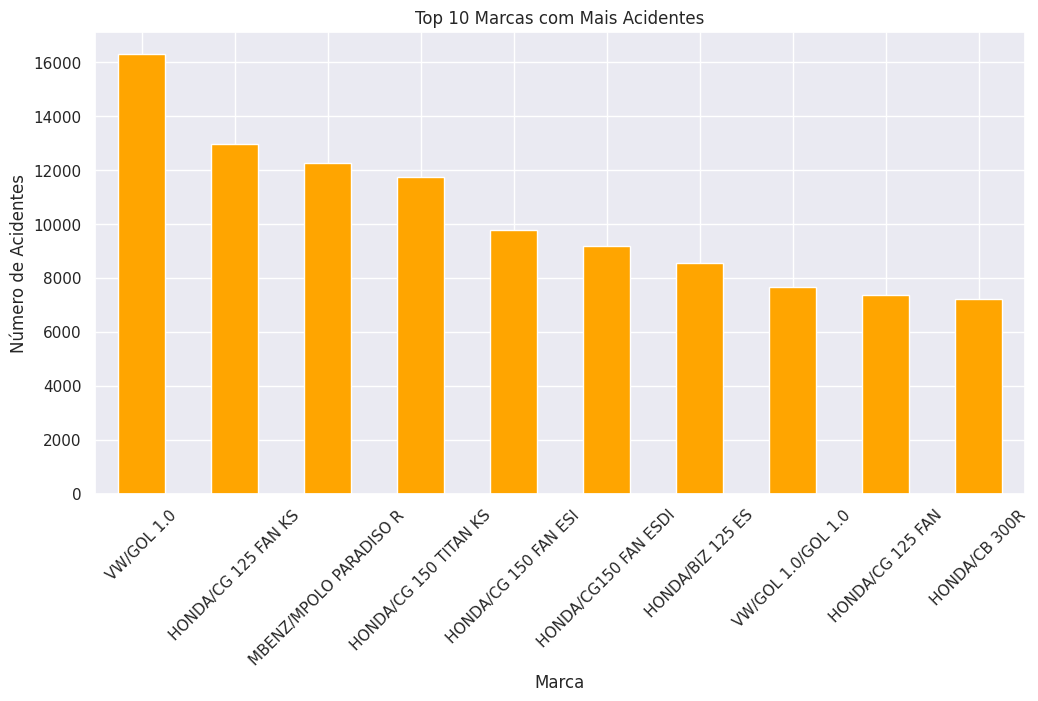

In [40]:
if 'marca' in df_veiculos.columns:
    # Contagem de acidentes por marca
    acidentes_por_marca = df_veiculos['marca'].value_counts()

    # Top 10 marcas com mais acidentes
    top_10_marcas = acidentes_por_marca.head(10)
    print("🚨 Top 10 marcas com mais acidentes:")
    print(top_10_marcas)

    # Visualização
    plt.figure(figsize=(12,6))
    top_10_marcas.plot(kind='bar', color='orange')
    plt.title("Top 10 Marcas com Mais Acidentes")
    plt.xlabel("Marca")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.show()
